# Lecture Week 5 Wed 10/30

In [1]:
# example from scikit-learn
# https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.KFold.html
from sklearn.model_selection import KFold
import numpy as np
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

In [7]:
# shuffle = True: shuffle the data before splitting into different folds.
# An analogy is shuffling a deck of cards before dealing them.


# Set random_state = your favorite number. This will make the results reproducible. That is, every time you run the code, you will get the same results.
kf = KFold(n_splits=4, shuffle=True,random_state=0)
# get the indices of the train and test sets
for train_index, test_index in kf.split(X):
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

  Train: index=[0 1 3]
  Test:  index=[2]
  Train: index=[0 1 2]
  Test:  index=[3]
  Train: index=[0 2 3]
  Test:  index=[1]
  Train: index=[1 2 3]
  Test:  index=[0]


In [8]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"  i: {i}")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

  i: 0
  Train: index=[0 1 3]
  Test:  index=[2]
  i: 1
  Train: index=[0 1 2]
  Test:  index=[3]
  i: 2
  Train: index=[0 2 3]
  Test:  index=[1]
  i: 3
  Train: index=[1 2 3]
  Test:  index=[0]


In [9]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the Penguins dataset
df = sns.load_dataset('penguins')
df.dropna(inplace=True)  # Remove missing values

# features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm']
features = ['flipper_length_mm']
target = ['body_mass_g']  

# Initialize linear regression model
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=1)


all_scores = []

for i, (train_index, test_index) in enumerate(kf.split(df)):
    X_train = df[features].iloc[train_index] 
    X_test  = df[features].iloc[test_index]

    y_train = df[target].iloc[train_index]
    y_test = df[target].iloc[test_index]

    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)

    all_scores.append(score)

    print(f"Fold {i} R^2 score:", score)

print(f"Mean R^2 score: {np.mean(all_scores)}")

Fold 0 R^2 score: 0.725084353204537
Fold 1 R^2 score: 0.6993225273807326
Fold 2 R^2 score: 0.7895360534716703
Fold 3 R^2 score: 0.7782229609972658
Fold 4 R^2 score: 0.794602971686194
Mean R^2 score: 0.75735377334808


In [10]:
from sklearn.model_selection import cross_val_score


# Initialize linear regression model
model = LinearRegression()

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)
    
# Perform cross-validation
scores = cross_val_score(model, df[features], df[target], cv=kf, scoring='r2')

# Output the scores for each fold
print("R^2 scores for each fold:", scores)
print("Average R^2 score:", scores.mean())
print("Standard deviation of R^2 scores:", scores.std())


R^2 scores for each fold: [0.72508435 0.69932253 0.78953605 0.77822296 0.79460297]
Average R^2 score: 0.75735377334808
Standard deviation of R^2 scores: 0.03812523025201445


# Scaling

Let $X$ be the feature vector (one column of the design matrix) and $X'$ to be the scaled feature vector.

Here some scaling methods:

- Min-max scaling: scales the data to be in the range [0, 1]

$$ X' = \frac{X - \min(X)}{\max(X) - \min(X)} $$

- Standardization (z-score scaling): scales the data to have mean 0 and standard deviation 1

$$ X' = \frac{X - \bar{X}}{\sigma_X} $$

where $\bar{X}$ is the sample mean of $X$ and $\sigma_X$ is the sample standard deviation of $X$.

These are linear transformations of the data. Sometimes we also want to transform the data non-linearly. For example, we might want to take the logarithm of the data if the data spans several orders of magnitude.

# Poll
Suppose we want to use bill_length_mm to predict body_mass_g

First standardize the data, then fit a linear regression model

What is the intercept of the model?

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('penguins')
df.dropna(inplace=True)  # Remove missing values

# Selecting numerical features
X = df[['bill_length_mm']]
y = df[['body_mass_g']]

model = LinearRegression()
model.fit(X, y)
print(f"Intercept: {model.intercept_}, slope: {model.coef_}")

Intercept: [388.84515876], slope: [[86.79175965]]


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [18]:
model.fit(X_scaled, y_scaled)
print(f"After scaling: Intercept: {model.intercept_}, slope: {model.coef_}")

After scaling: Intercept: [-3.97095663e-16], slope: [[0.58945111]]


In [16]:
X_scaled

array([[-8.96041890e-01],
       [-8.22787867e-01],
       [-6.76279821e-01],
       [-1.33556603e+00],
       [-8.59414878e-01],
       [-9.32668901e-01],
       [-8.77728384e-01],
       [-5.29771775e-01],
       [-9.87609419e-01],
       [-1.72014965e+00],
       [-1.35387953e+00],
       [-9.69295913e-01],
       [-2.73382694e-01],
       [-1.75677666e+00],
       [ 3.67590007e-01],
       [-1.13411746e+00],
       [-1.15243097e+00],
       [-1.48207407e+00],
       [-1.06086344e+00],
       [-9.50982407e-01],
       [-1.59195511e+00],
       [-6.21339303e-01],
       [-6.39652809e-01],
       [-1.11580396e+00],
       [-6.39652809e-01],
       [-8.22787867e-01],
       [-1.24399850e+00],
       [-8.22787867e-01],
       [-5.66398786e-01],
       [-1.39050655e+00],
       [-8.77728384e-01],
       [-9.50982407e-01],
       [-3.28323211e-01],
       [-1.17074448e+00],
       [-7.67847349e-01],
       [-1.37219304e+00],
       [-5.84712292e-01],
       [-1.46376057e+00],
       [ 1.9

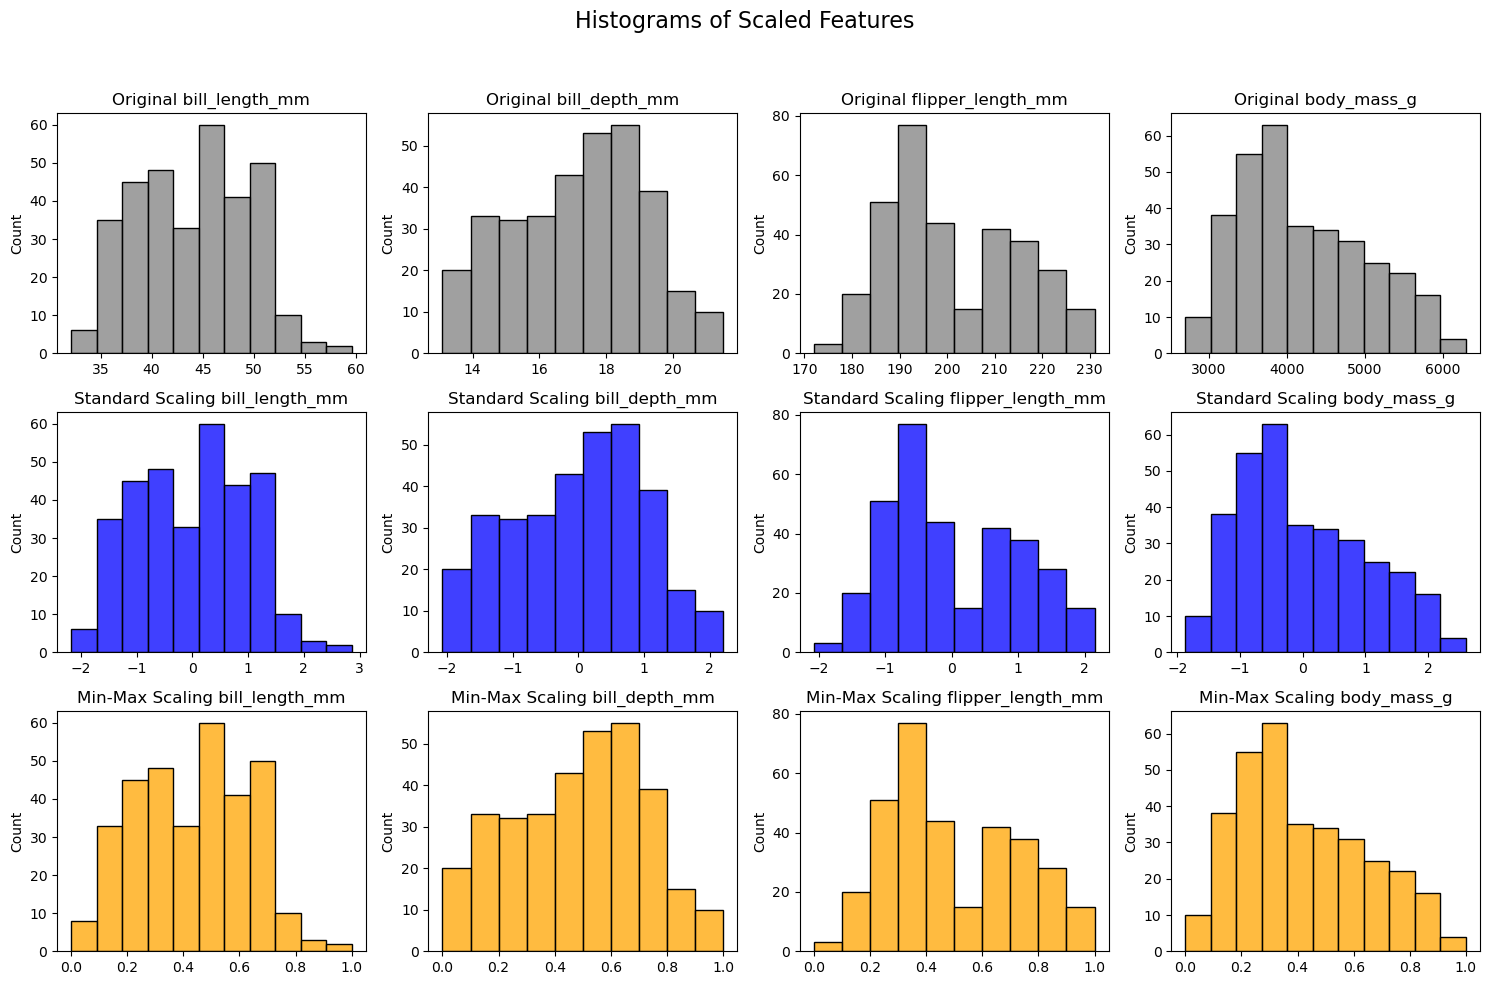

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

# Load the Penguins dataset
df = sns.load_dataset('penguins')
df.dropna(inplace=True)  # Remove missing values


# Selecting numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Creating scalers
# scalers = {
#     'Standard Scaling': StandardScaler(),
#     'Min-Max Scaling': MinMaxScaler()
# }


# Creating scalers
scalers = {
    'Standard Scaling': StandardScaler(),
    'Min-Max Scaling': MinMaxScaler()
}

colors = ['gray', 'blue', 'orange']

# Plotting the histograms
fig, axes = plt.subplots(len(scalers) + 1, len(numerical_features), figsize=(15, 10))
fig.suptitle('Histograms of Scaled Features', fontsize=16)

# Original data histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(df[numerical_features[i]], ax=axes[0, i], color=colors[0])
    axes[0, i].set_title(f'Original {feature}')
    axes[0, i].set_xlabel('')

# Scaled data histograms
for row, (name, scaler) in enumerate(scalers.items(), start=1):
    # Fit and transform the data
    scaled_data = scaler.fit_transform(df[numerical_features])
    scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)
    
    for i, feature in enumerate(scaled_df.columns):
        sns.histplot(scaled_df[feature], ax=axes[row, i], color=colors[row])
        axes[row, i].set_title(f'{name} {feature}')
        axes[row, i].set_xlabel('')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust subplots to fit the title
plt.show()

# Why do we need scaling

For ordinary least squares (OLS) regression, the scale of the features does not matter. However, for some other machine learning method that we will introduce later in this class, the magnitude of the features can have a significant impact on the model. 

For example, many machine learning algorithm require some notion of "distance" between data points in high-dimensional space. 

If we consider the Euclidean distance between two data points, the distance between two points $x$ and $y$ in $d$-dimensional space is

$$ \sqrt{\sum_{i=1}^d (x_i - y_i)^2} $$

where $x_i$ and $y_i$ are the $i$-th feature/coordinate of the two data points. If the features are on different scales, then the distance will be dominated by the features with the largest scale.

Even for linear regression, scaling might help with the interpretation of the coefficients.

After standardization, all features are measured in standard deviations, so each coefficient represents the expected change in the target variable for a one standard deviation increase in the feature. 

This makes it possible to compare the magnitudes of the coefficients, as they’re all in the same units (standard deviations of the features).